# Práctica 3

In [1]:
import os
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import TweetTokenizer

In [2]:
def get_text_from_file(path_file: str, target_file: str) -> list:
    file_txt = []
    target_txt = []

    with open(path_file, 'r', encoding="utf8") as f_corpus, open(target_file, 'r', encoding="utf8") as f_target:
        for tweet in f_corpus:
            file_txt += [tweet]
        for target in f_target:
            target_txt += [target]
    
    file_txt = list(map(str.strip, file_txt))
    target_txt = list(map(int, target_txt))
    
    return file_txt, target_txt

def order_dic_frec(fdic):
    aux = [(fdic[key], key) for key in fdic]
    aux.sort()
    aux.reverse()
    return aux

def BoW(text, vocabulario, dict_index):
    BOW = np.zeros((len(text), len(vocabulario)), dtype=int)
    
    cont_doc = 0
    
    for doc in text:
        fdist_doc = nltk.FreqDist(tk.tokenize(doc))
        
        for word in fdist_doc:
            if word in dict_index:
                BOW[cont_doc, dict_index[word]] = 1
        cont_doc += 1
    
    return BOW

In [6]:
os.getcwd()

'C:\\Users\\ericl\\tareas_nlp\\tarea_3'

In [8]:
file_txt_train, target_txt_train = get_text_from_file("../tarea_2/data_mex/mex20_train.txt", "../tarea_2/data_mex/mex20_train_labels.txt")
file_txt_val, target_txt_val = get_text_from_file("../tarea_2/data_mex/mex20_val (1).txt", "../tarea_2/data_mex/mex20_val_labels (1).txt")

tk = TweetTokenizer()
corpus = []
for file in file_txt_train:
    corpus += tk.tokenize(file)

fdist = nltk.FreqDist(corpus)
V = order_dic_frec(fdist)
V = V[:5000]

# Indices (caracter top, 0 para el mayor frec)
dict_index = dict()
count = 0
for weight, word in V:
    dict_index[word] = count
    count += 1

# Bolsa de Términos
BOW_tr = BoW(file_txt_train, V, dict_index)

**Distributed Representations**: palabras u otras entidades textuales se representan como vectores en un espacio de alta dimensionalidad en modelos de lenguaje. 


$$w_{k,j} = df(d_k,t_j) \log{\frac{|T|}{N_k}}$$


$$
df(d_k, t_j) =
\begin{cases} 
1 + \log(\#(d_k, t_j)) & \text{si } \#(d_k, t_j) > 0 \\
0 & \text{si } \#(d_k, t_j) = 0
\end{cases}
$$


In [11]:
import math 

def compute_dor(TR):
    # Los documentos que dejas  
    TR_subset_in = TR
    # entrada: (doc,termino) -> salida (termino, doc)
    DTR = np.zeros((TR_subset_in.shape[1], TR_subset_in.shape[0]), dtype=np.float64)

    print('DOR: shape of the input matrix (BoT): ', TR.shape)
    print('DOR: shape of the term.feat matrix:', DTR.shape)

    tam_V = TR_subset_in.shape[1]
    for doc, i in zip(TR_subset_in, range(len(TR_subset_in))):
        nonzero_position = np.nonzero(doc)[0] # regresa una tuppla y en la posicion 0 tenemos el # de elemento en el vocabulario
        #tamano del vocabulario en el documento actual
        tam_v = len(nonzero_position) 
        for term in nonzero_position:
            DTR[term, i] = (1 + math.log10(doc[term]) * math.log10(tam_V / tam_v))
    return DTR 

In [13]:
DOR_base = compute_dor(BOW_tr)

DOR: shape of the input matrix (BoT):  (5278, 5000)
DOR: shape of the term.feat matrix: (5000, 5278)


In [10]:
# file_txt_train

In [14]:
from sklearn import preprocessing 
DOR_base = compute_dor(BOW_tr)
DOR_base = preprocessing.normalize(DOR_base, norm='l2')

DOR: shape of the input matrix (BoT):  (5278, 5000)
DOR: shape of the term.feat matrix: (5000, 5278)


In [15]:
from sklearn.feature_selection import SelectKBest, chi2

feats = SelectKBest(chi2, k = 1000)
feats.fit(BOW_tr, target_txt_train)

SelectKBest(k=1000, score_func=<function chi2 at 0x000001AE6C67B9C0>)

In [18]:
best = feats.get_support(indices=True)
# best

In [19]:
dict_indice_invertido = dict()
for w in dict_index: 
    dict_indice_invertido[dict_index[w]] = w #key es el ranking y value la palabra
# dict_indice_invertido

In [21]:
target_word = [dict_indice_invertido[index] for index in best]
# target_word

In [22]:
target_matrix = np.array([DOR_base[dict_index[word]] for word in target_word])
target_matrix.shape

(1000, 5278)

In [23]:
from sklearn.manifold import TSNE

reduced_matrix= TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(target_matrix)

In [29]:
from tsne import tsne
reduced_matrix = tsne(target_matrix,2)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 1000...
Computing P-values for point 500 of 1000...
Mean value of sigma: 0.102300
Iteration 10: error is 17.575199
Iteration 20: error is 17.277623
Iteration 30: error is 16.903127
Iteration 40: error is 16.995459
Iteration 50: error is 16.933631
Iteration 60: error is 16.935223
Iteration 70: error is 16.959956
Iteration 80: error is 16.925575
Iteration 90: error is 16.941623
Iteration 100: error is 16.932941
Iteration 110: error is 1.973347
Iteration 120: error is 1.475005
Iteration 130: error is 1.288683
Iteration 140: error is 1.183549
Iteration 150: error is 1.115350
Iteration 160: error is 1.070787
Iteration 170: error is 1.038904
Iteration 180: error is 1.014305
Iteration 190: error is 0.994750
Iteration 200: error is 0.979143
Iteration 210: error is 0.966169
Iteration 220: error is 0.955247
Iteration 230: error is 0.946260
Iteration 240: error is 0.938764
Iteration 250: error is

In [30]:
max_x = np.amax(reduced_matrix, axis = 0)[0]
max_y = np.amax(reduced_matrix, axis = 0)[1]

C:\Users\ericl\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\ericl\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127814 (\N{AUBERGINE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\ericl\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\ericl\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\ericl\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129316 (\N{DROOLING FACE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\ericl\AppD

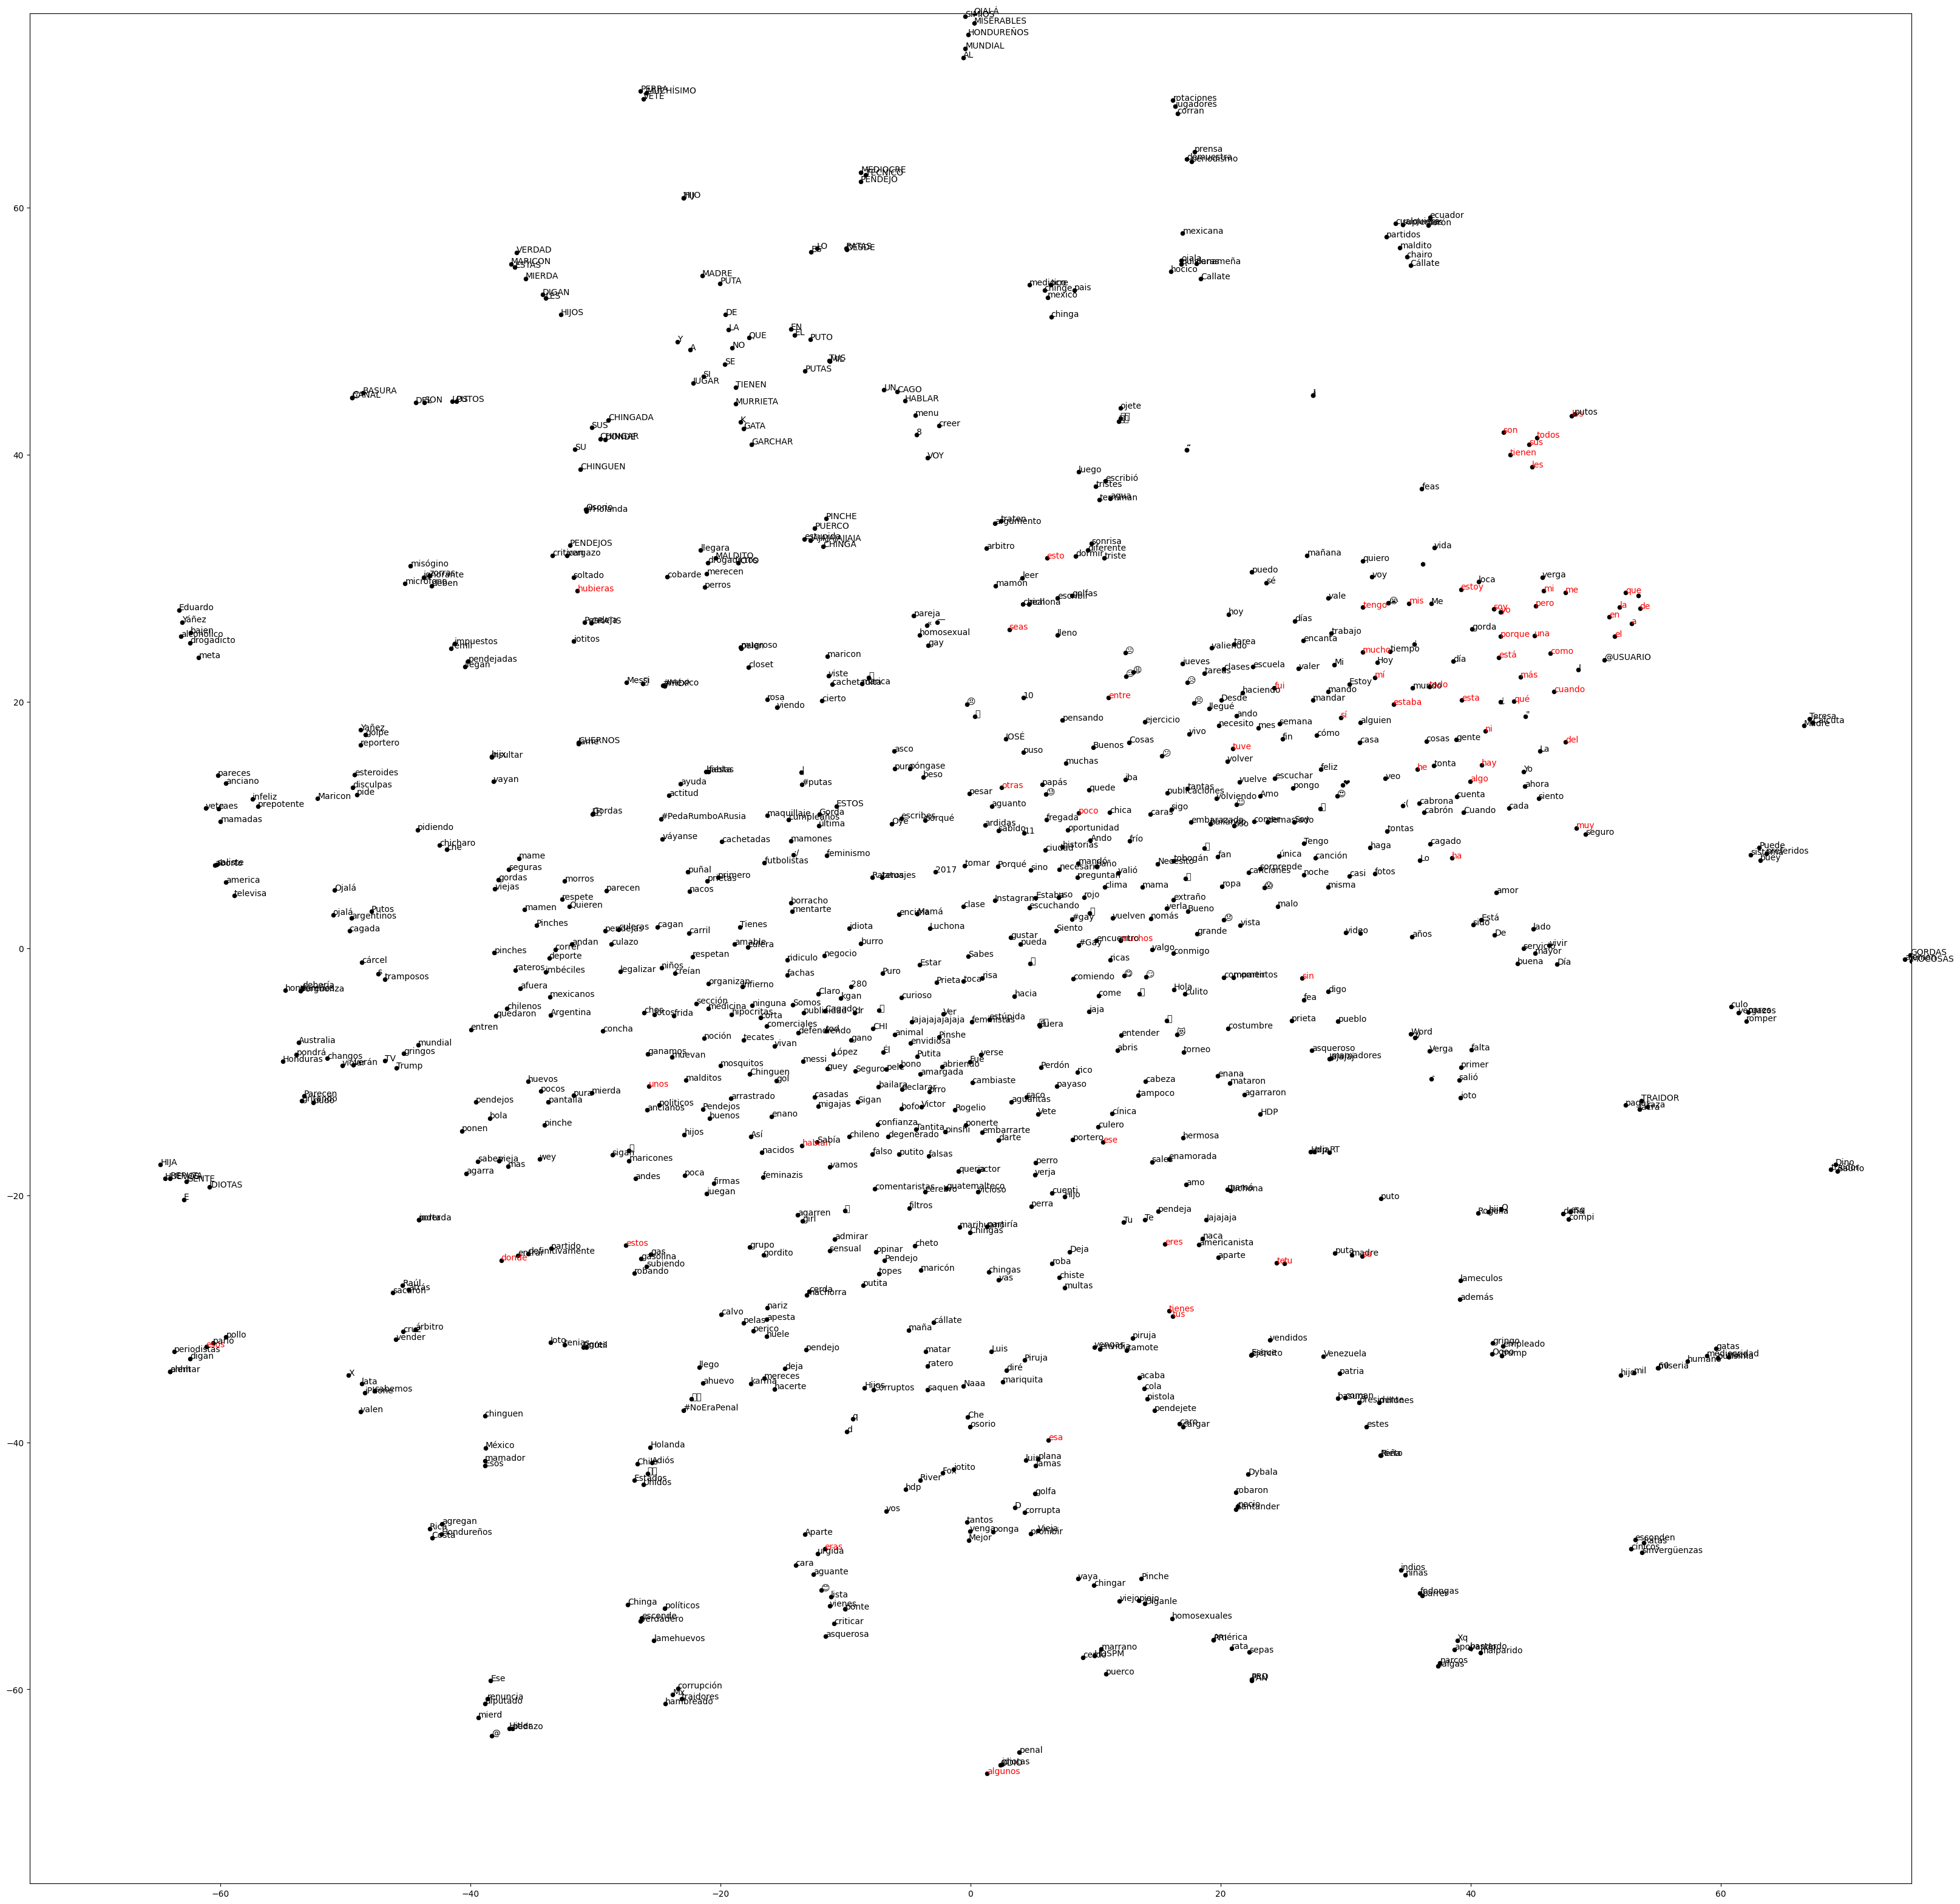

In [31]:
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords

sw = set(stopwords.words('spanish'))

plt.figure(figsize=(40, 40), dpi=100)
plt.xlim(-max_x, max_x)
plt.ylim(-max_y, max_y)
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], 20, color="black")

for idx, word in enumerate(target_word[:]):
    x = reduced_matrix[idx, 0]
    y = reduced_matrix[idx, 1]
    if word in sw: 
        plt.annotate(word, (x,y), color = 'red')
    else:
        plt.annotate(word, (x, y), color='black')

<function matplotlib.pyplot.show(close=None, block=None)>

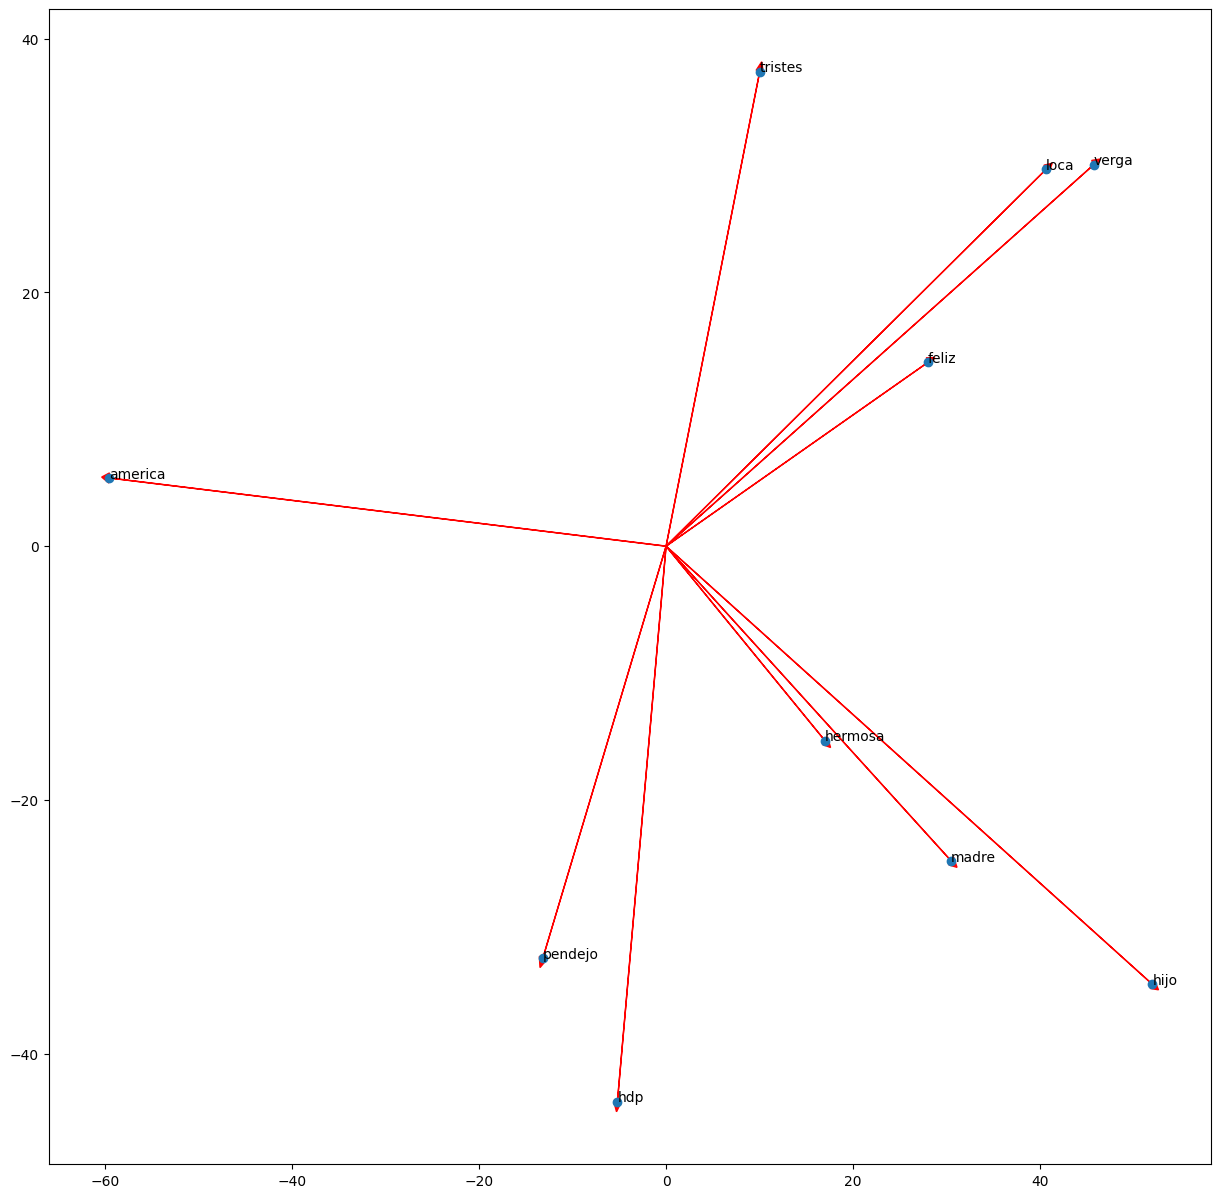

In [36]:
words_selected = ['tristes', 'gato', 'hermosa', 'verga', 'pendejo',
                  'madre', 'hdp', 'bonita', 'feliz', 'alegría', 'wey'
                  'mierda','loca','hijo','corrupto','america', 'tia', 'toluca']

ploted_subsetwords = []
subreduced_matrix = []
for idx, word in enumerate(target_word[:]): 
    if word in words_selected:
        ploted_subsetwords += [word]
        subreduced_matrix += [reduced_matrix[idx]]

subreduced_matrix = np.array(subreduced_matrix)

ig, ax = plt.subplots(figsize=(15, 15))
col1 = 0
col2 = 1

for word in subreduced_matrix:
    ax.arrow(0,0,word[col1],word[col2],head_width=0.8,head_length=0.8,fc='r',ec='r',width=1e-2)

ax.scatter(subreduced_matrix[:,col1],subreduced_matrix[:,col2])

for i in range(0,len(ploted_subsetwords)):
    ax.annotate(ploted_subsetwords[i],(subreduced_matrix[i,col1],subreduced_matrix[i,col2]))
plt.show
